In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
artworks = pd.read_csv('artwork_data.csv')

C:\Users\ecede\AppData\Local\Temp\ipykernel_1508\2191717600.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  artworks = pd.read_csv('artwork_data.csv')


In [3]:
artworks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69201 entries, 0 to 69200
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69201 non-null  int64  
 1   accession_number    69201 non-null  object 
 2   artist              69201 non-null  object 
 3   artistRole          69201 non-null  object 
 4   artistId            69201 non-null  int64  
 5   title               69201 non-null  object 
 6   dateText            69201 non-null  object 
 7   medium              62817 non-null  object 
 8   creditLine          69198 non-null  object 
 9   year                63823 non-null  object 
 10  acquisitionYear     69156 non-null  float64
 11  dimensions          66768 non-null  object 
 12  width               65860 non-null  object 
 13  height              65860 non-null  object 
 14  depth               2514 non-null   float64
 15  units               65860 non-null  object 
 16  insc

In [4]:
artists = pd.read_csv('artist_data.csv')

In [5]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3532 non-null   int64  
 1   name          3532 non-null   object 
 2   gender        3416 non-null   object 
 3   dates         3470 non-null   object 
 4   yearOfBirth   3472 non-null   float64
 5   yearOfDeath   2228 non-null   float64
 6   placeOfBirth  3040 non-null   object 
 7   placeOfDeath  1453 non-null   object 
 8   url           3532 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 248.5+ KB


In [6]:
combined = pd.merge(artworks, artists, on="id")

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3345
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3346 non-null   int64  
 1   accession_number    3346 non-null   object 
 2   artist              3346 non-null   object 
 3   artistRole          3346 non-null   object 
 4   artistId            3346 non-null   int64  
 5   title               3346 non-null   object 
 6   dateText            3346 non-null   object 
 7   medium              3344 non-null   object 
 8   creditLine          3345 non-null   object 
 9   year                3084 non-null   object 
 10  acquisitionYear     3340 non-null   float64
 11  dimensions          3260 non-null   object 
 12  width               3240 non-null   object 
 13  height              3240 non-null   object 
 14  depth               314 non-null    float64
 15  units               3240 non-null   object 
 16  inscri

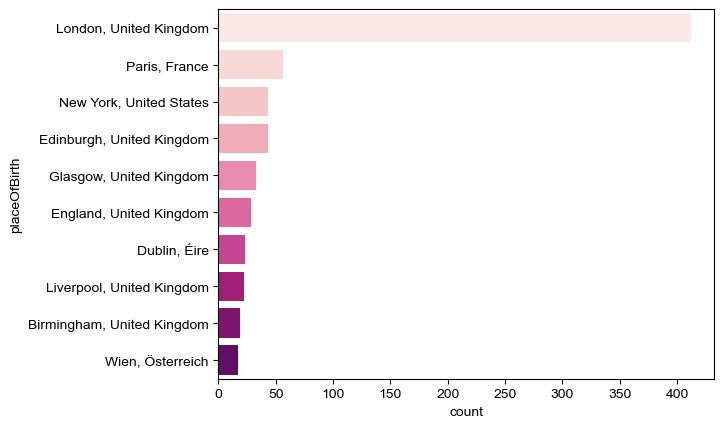

In [8]:
birthplace = combined[combined['placeOfBirth'].isin(combined.placeOfBirth.value_counts().nlargest(10).index.tolist())]
large_to_small_places = birthplace.groupby('placeOfBirth').size().sort_values().index[::-1]
sns.countplot(y = 'placeOfBirth', data=birthplace, order=large_to_small_places, palette='RdPu')
sns.set(rc={'figure.figsize':(10,5)})

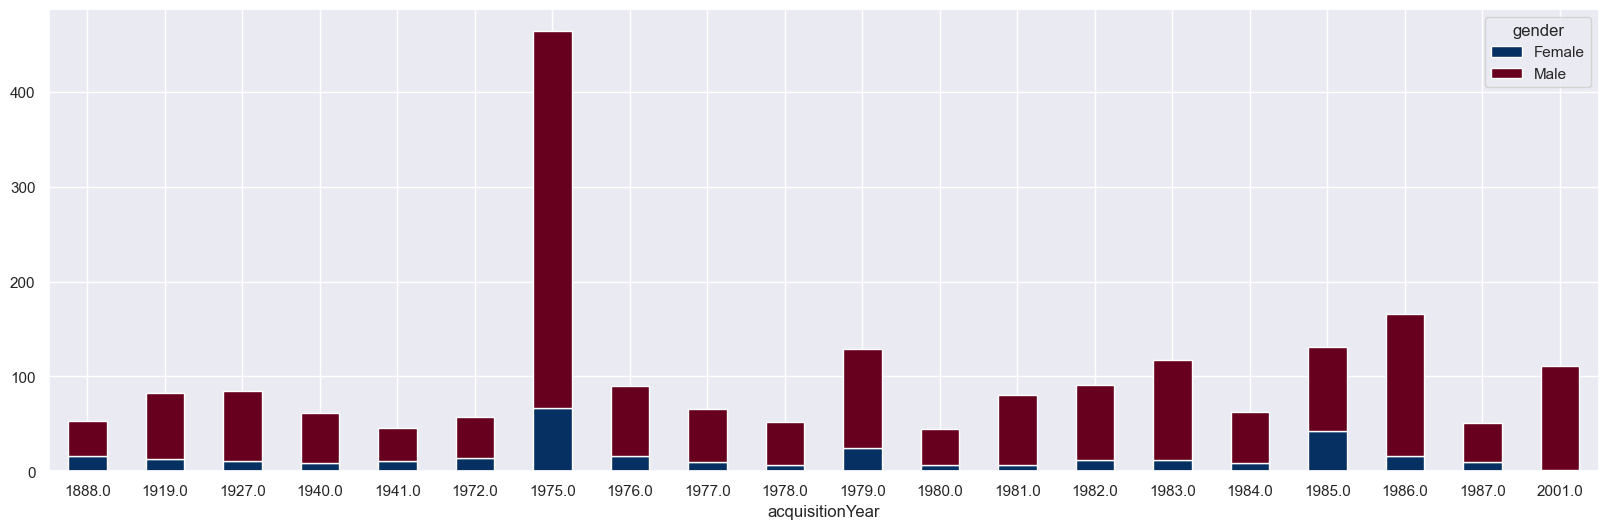

In [9]:
combined = combined[combined['acquisitionYear'].isin(combined.acquisitionYear.value_counts().nlargest(20).index.tolist())]
acquisitionYear = combined[combined['gender'].isin(combined.gender.value_counts().nlargest(2).index.tolist())]
classification_date = acquisitionYear.groupby(['acquisitionYear','gender']).size().unstack().plot.bar(stacked=True, rot=0, figsize=(20,6), colormap='RdBu_r')

plt.show()

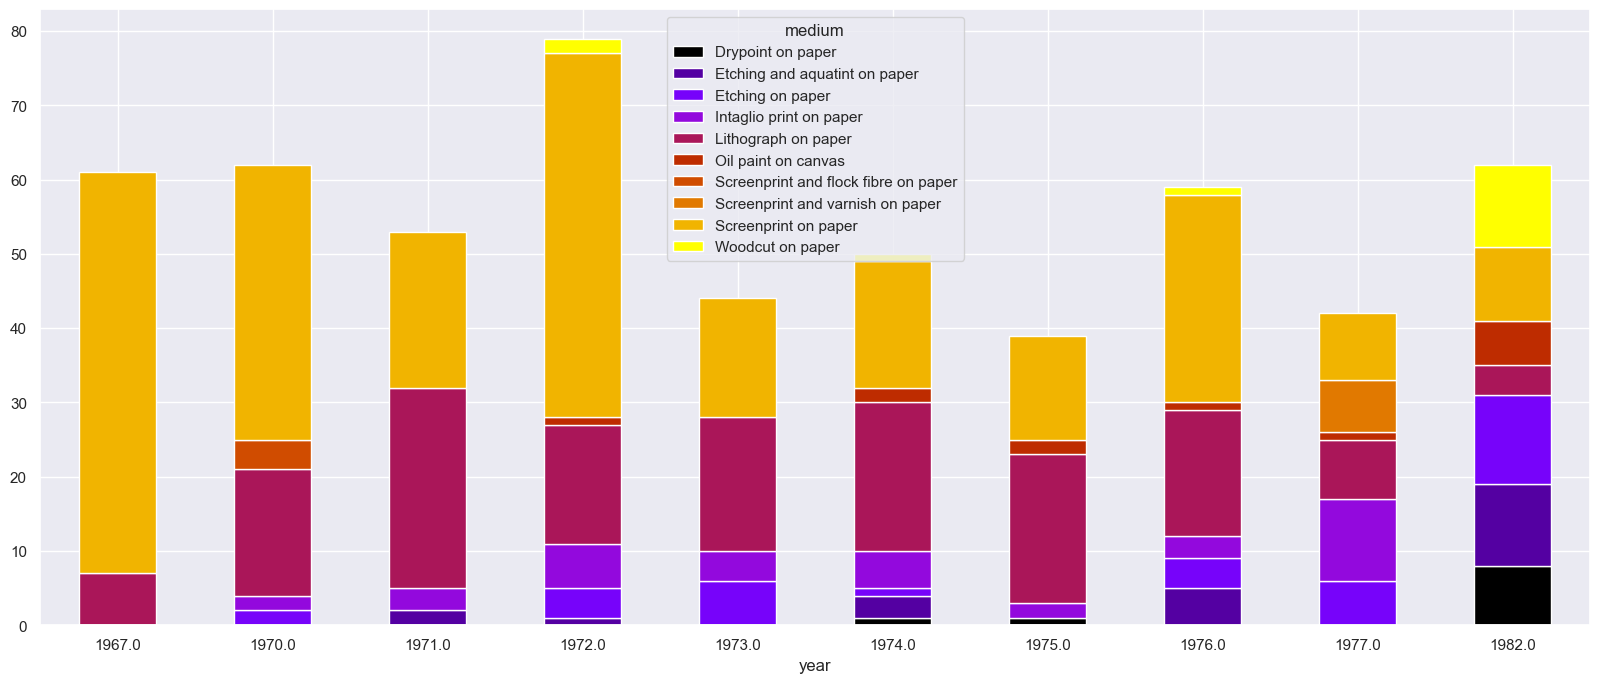

In [10]:
combined = combined[combined['year'].isin(combined.year.value_counts().nlargest(10).index.tolist())]
medium = combined[combined['medium'].isin(combined.medium.value_counts().nlargest(10).index.tolist())]
medium_year = medium.groupby(['year','medium']).size().unstack().plot.bar(stacked=True, rot=0, figsize=(20,8), colormap='gnuplot')

In [11]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

text = combined['title'].values 

wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', colormap='rainbow_r', collocations=False, stopwords = STOPWORDS).generate(str(text))

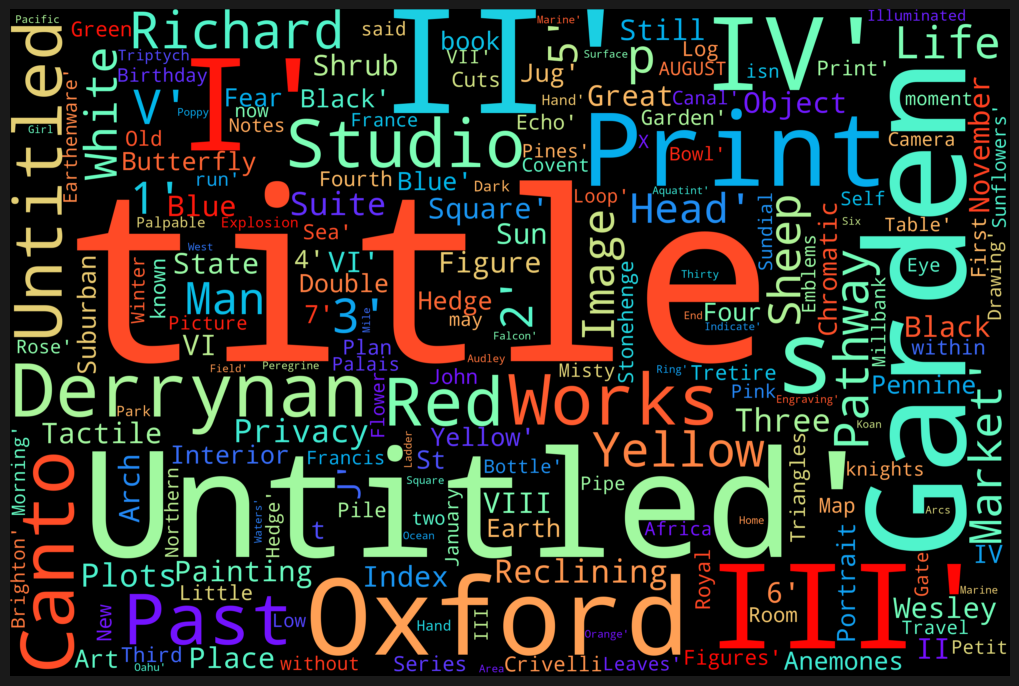

In [12]:
plt.figure(figsize=(10,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()